In [11]:
from IPython.core.interactiveshell import InteractiveShell
from datetime import datetime
import time

#basic externals
import pandas as pd
import numpy as np
import os
import matplotlib as plt 

from xm_functions import *

%matplotlib inline
%reload_ext autoreload
%autoreload 2


InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_rows = 20
pd.options.display.max_columns = 50 
pd.set_option(
    "display.float_format", lambda x: "%.3f" % x
    )  # display numbers as decimals instead of scientific value

plt.rcParams["font.size"] = (18)

In [12]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
data_store = pd.read_csv("store.csv")

In [33]:
df_train = pd.read_feather('df_train').drop('index', axis = 1)
df_test = pd.read_feather('df_test').drop('index', axis = 1)

In [14]:
data_store.head(2)

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a             1270.000                      9.000   
1      2         a          a              570.000                     11.000   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                  2008.000       0              nan              nan   
1                  2007.000       1           13.000         2010.000   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct

In [15]:
full_df = pd.read_feather('full_df')

In [16]:
full_df.head(2)

index  Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0      0      1          2 2013-01-01  0.000      0.000 0.000      0   
1      1      2          2 2013-01-01  0.000      0.000 0.000      0   

  StateHoliday  SchoolHoliday  Id  IsStateHoliday  Year  Month  Day  \
0            a              1 nan            True  2013      1    1   
1            a              1 nan            True  2013      1    1   

   Timestamp StoreType Assortment  CompetitionDistance  Promo2  \
0      0.000         c          a             1270.000       0   
1      0.000         a          a              570.000       1   

     PromoInterval CompetitionOpenSince  CompetitionDaysOpen  \
0             None           2008-09-01                 1583   
1  Jan,Apr,Jul,Oct           2007-11-01                 1888   

   CompetitionIsOpen  Promo2Days  Promo2IsActive  AfterSchoolHoliday  \
0                  1           0               0                   0   
1                  1        1009               1                   0   

   BeforeSchoolHoliday  AfterIsStateHoliday  BeforeIsStateHoliday  AfterPromo  \
0                    0                    0                     0           0   
1                    0                    0                     0           0   

   BeforePromo  rolling_sales_half_year_med  rolling_sales_prev_year_med  \
0           -6                        0.000                        0.000   
1           -6                        0.000                        0.000   

   rolling_sales_half_year_mean  rolling_sales_prev_year_mean  \
0                         0.000                         0.000   
1                         0.000                         0.000   

   rolling_customers_half_year_med  rolling_customers_prev_year_med  \
0                            0.000                            0.000   
1                            0.000                            0.000   

   rolling_customers_half_year_mean  rolling_customers_prev_year_mean  \
0                             0.000                             0.000   
1                             0.000                             0.000   

   sales_per_customers_half_year_mean  sales_per_customers_half_year_med  
0                               0.000                              0.000  
1                               0.000                              0.000

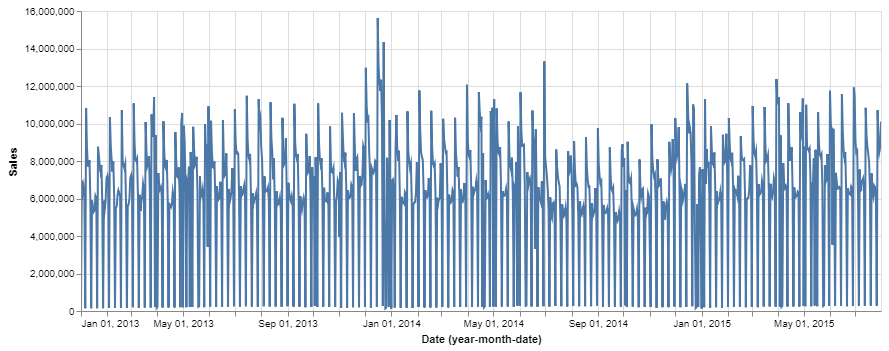

In [17]:
import altair as alt

df_plt = data_train.groupby('Date').sum().reset_index()
alt.Chart(df_plt, width = 800 ).mark_line().encode(
    alt.X('yearmonthdate(Date)'),
    y='Sales',
).interactive('Date', bind_x=True)

default


RendererRegistry.enable('default')

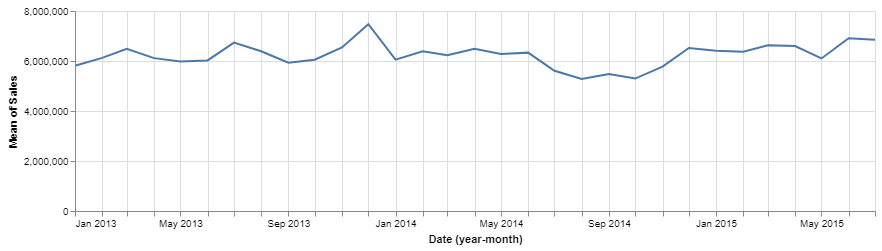

AttributeError: 'Chart' object has no attribute 'mark_errorbar'

In [9]:
import altair as alt

print(alt.renderers.active)
alt.renderers.enable('default')

## Yearly
df_plt = data_train.groupby('Date').sum().reset_index()
base = alt.Chart(df_plt, width = 800, height =200 )
mean = base.mark_line().encode(
    alt.X('yearmonth(Date)'),
    y='mean(Sales)',
)
mean

## Monthly
base = alt.Chart(df_plt, width = 800, height =200 )
mean = base.mark_line().encode(
    alt.X('month(Date)'),
    y='mean(Sales)',
)

error = alt.Chart(df_plt).mark_errorbar(extent='ci').encode(
    alt.X('month(Date)'),
    y='error(Sales)',
)

mean+error


## 
df_plt = data_train.groupby('DayOfWeek').sum().reset_index()
base = alt.Chart(df_plt, width = 800, height =200 )
mean = base.mark_line().encode(
    alt.X('DayOfWeek', axis = alt.Axis(tickCount =7)) ,
    y='mean(Sales)',
)
mean

In [ ]:
df_plt.head()

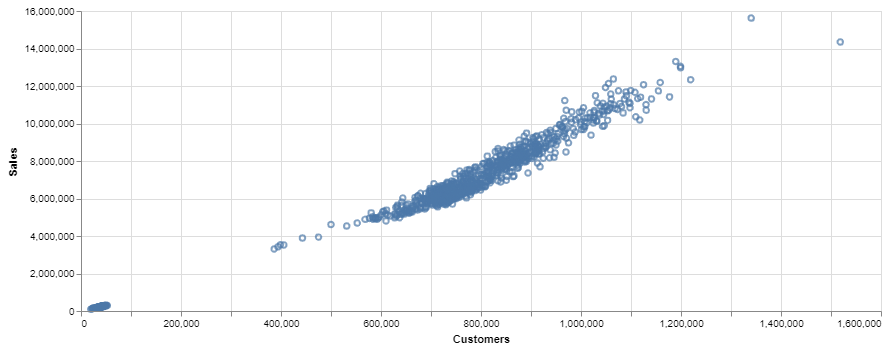

In [9]:

df_plt = data_train.groupby('Date').sum().reset_index()

alt.Chart(df_plt, width = 800 ).mark_point().encode(
    x='Customers',
    y='Sales',
)

## Group by store

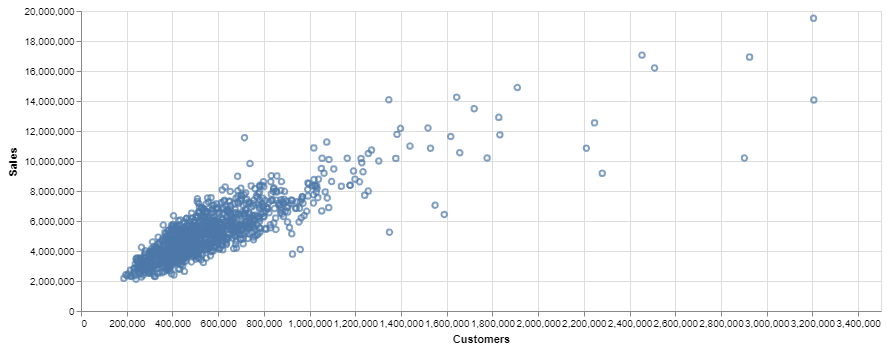

In [10]:

df_plt = data_train.groupby('Store').sum().reset_index()

alt.Chart(df_plt, width = 800 ).mark_point().encode(
    x='Customers',
    y='Sales',
)

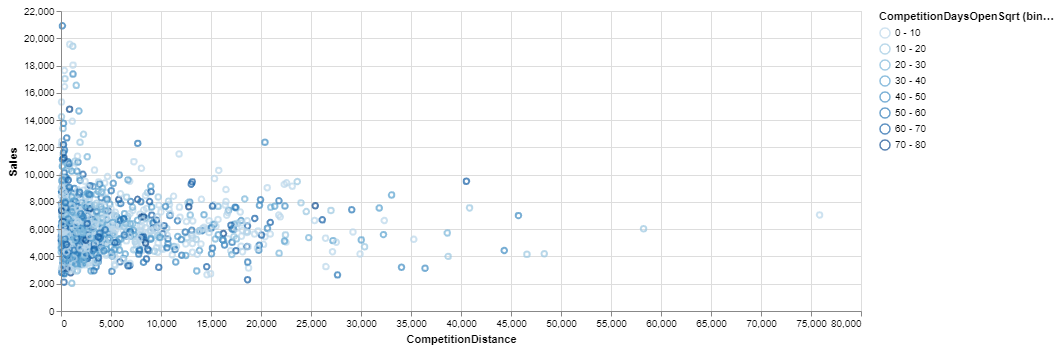

In [28]:
df_plt = full_df.groupby('Store').median().reset_index()

alt.Chart(df_plt, width = 800 ).mark_point().encode(
    x='CompetitionDistance',
    y='Sales',
    color= alt.Color('CompetitionDaysOpenSqrt:N', bin=alt.Bin(maxbins=10))
)

## No clear correlation with competition

In [12]:
full_df['Count'] = 1

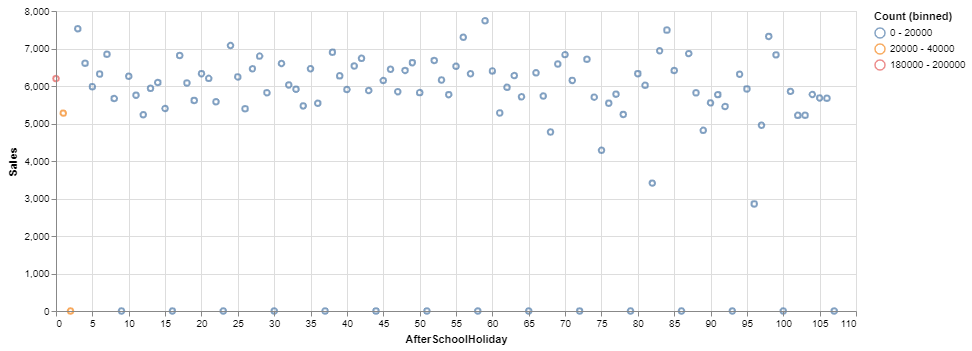

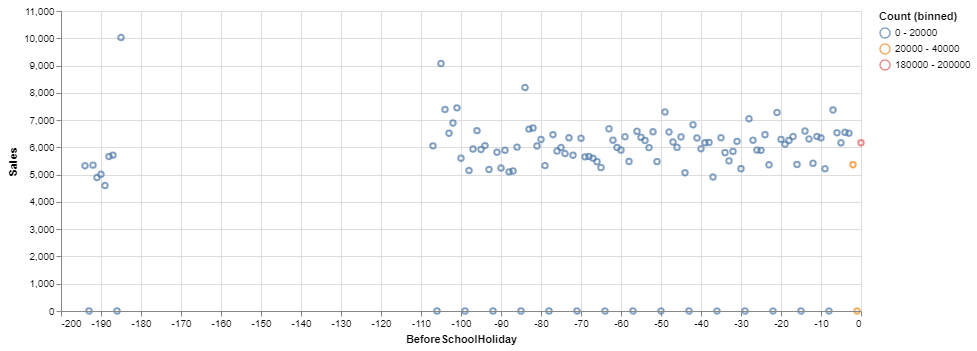

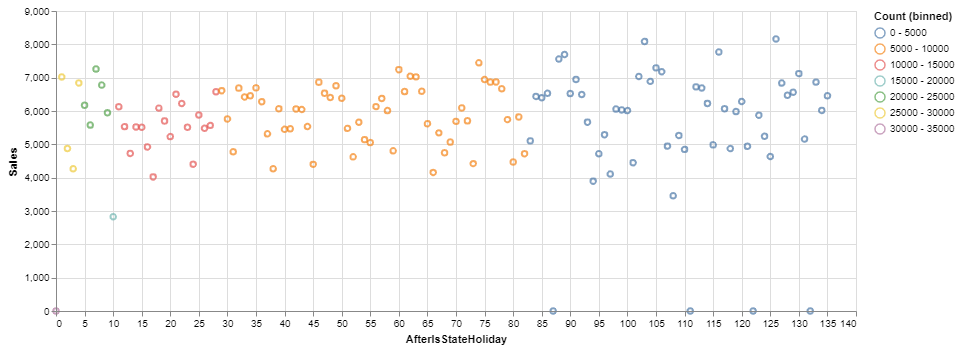

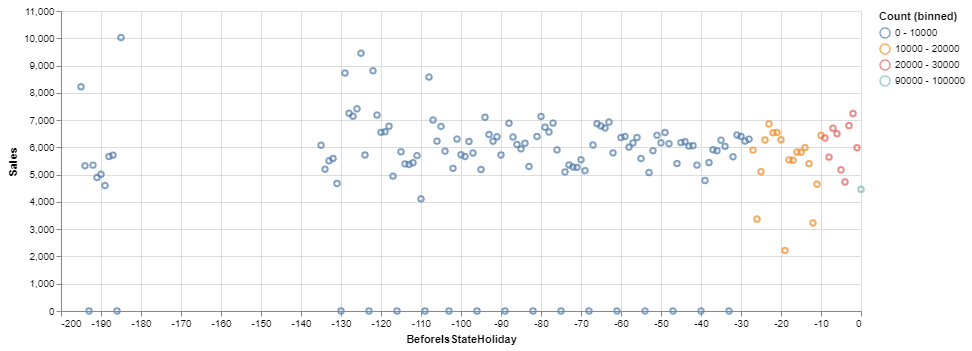

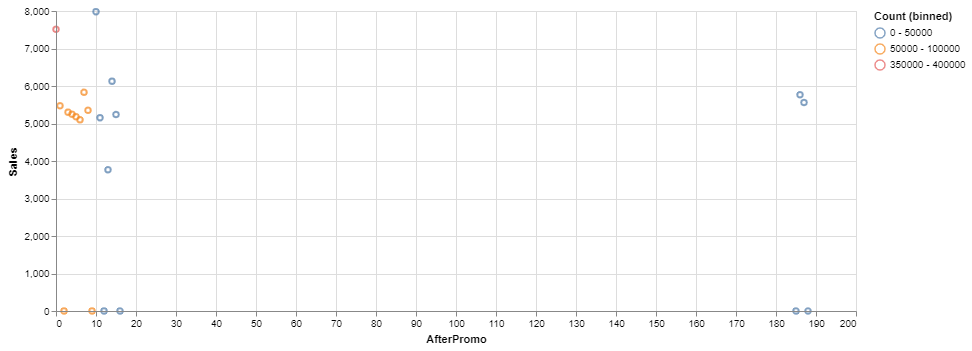

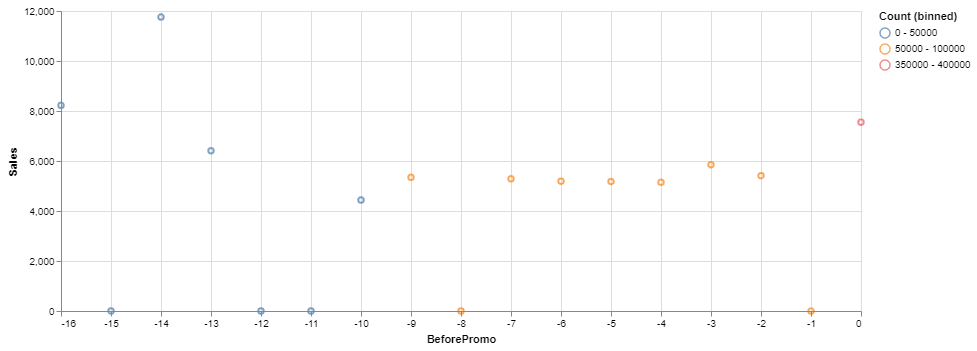

In [13]:
cols = ['AfterSchoolHoliday',
       'BeforeSchoolHoliday', 'AfterIsStateHoliday', 'BeforeIsStateHoliday',
       'AfterPromo', 'BeforePromo']

for col in cols:
    df_plt = full_df.groupby(col).agg({'Sales':'median', 'Count':'sum'}).reset_index()
    #removing too low occurences
    df_plt = df_plt[df_plt.Count > 50]
    alt.Chart(df_plt, width = 800 ).mark_point().encode(
        x=col,
        y='Sales',
        color= alt.Color('Count:N', bin=alt.Bin(maxbins=10))
    )


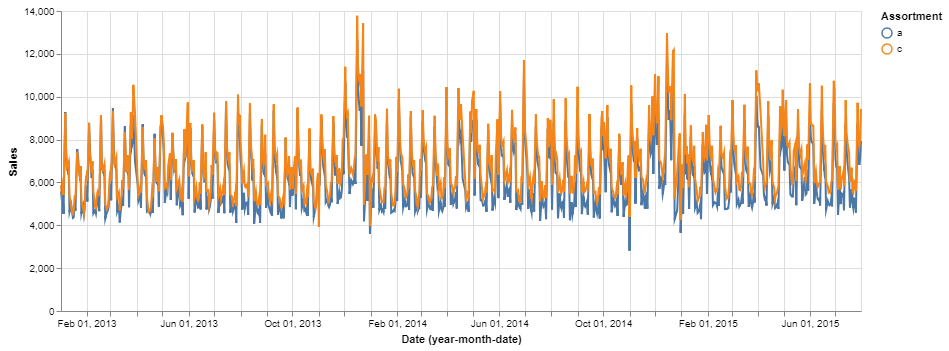

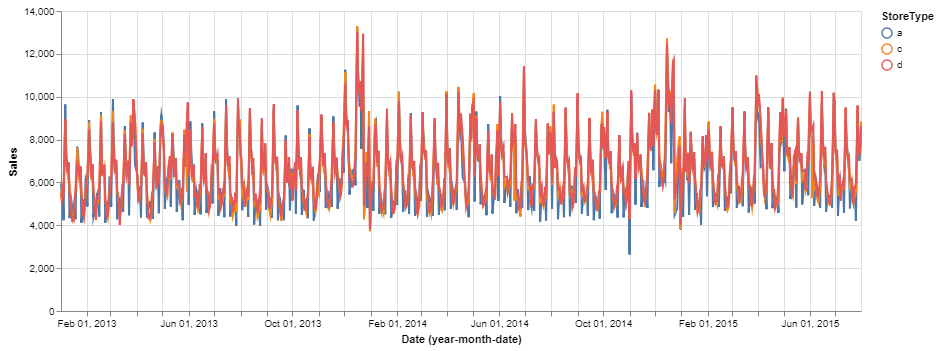

In [23]:
cols = ['Assortment',
       'StoreType']

for col in cols:
    df_plt = full_df.groupby(['Date', col]).agg({'Sales':'median', 'Count':'sum'}).reset_index()
    #removing too low occurences
    df_plt = df_plt.query('Count > 50 & Sales >0')
    alt.Chart(df_plt, width = 800 ).mark_line().encode(
        x=alt.X('yearmonthdate(Date)'),
        y='Sales',
        color= alt.Color(col)
    )


In [35]:
poly_data

xfit      fit
0   0.000 5500.452
1   0.002 5501.560
2   0.004 5502.669
3   0.006 5503.777
4   0.008 5504.886
5   0.010 5505.994
6   0.011 5507.103
7   0.013 5508.211
8   0.015 5509.320
9   0.017 5510.428
..    ...      ...
490 0.934 6043.602
491 0.936 6044.710
492 0.938 6045.819
493 0.940 6046.927
494 0.942 6048.035
495 0.944 6049.144
496 0.946 6050.252
497 0.948 6051.361
498 0.950 6052.469
499 0.951 6053.578

[500 rows x 2 columns]

Date WeekDay     yfit
0   2013-01-07       1 7813.671
1   2013-01-14       1 7819.803
2   2013-01-21       1 7825.935
3   2013-01-28       1 7832.066
4   2013-02-04       1 7838.198
5   2013-02-11       1 7844.329
6   2013-02-18       1 7850.461
7   2013-02-25       1 7856.593
8   2013-03-04       1 7862.724
9   2013-03-11       1 7868.856
..         ...     ...      ...
758 2015-05-18       6 6097.441
759 2015-06-01       6 6105.161
760 2015-06-08       6 6109.022
761 2015-06-15       6 6112.882
762 2015-06-22       6 6116.743
763 2015-06-29       6 6120.603
764 2015-07-06       6 6124.464
765 2015-07-13       6 6128.324
766 2015-07-20       6 6132.184
767 2015-07-27       6 6136.045

[768 rows x 3 columns]

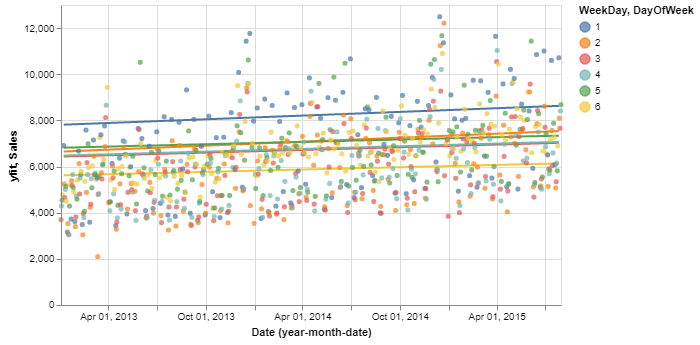

In [65]:
df_plt = df_train.query('Sales>0')

#poly_data = pd.DataFrame({'xfit': np.linspace(df_plt['Timestamp'].min(), df_plt['Timestamp'].max(), 500), 'Timestamp':})
poly_data = df_plt.query('Store ==1115 & DayOfWeek==1')[['Timestamp', 'Date', 'DayOfWeek']].copy()

for day in range(1,7):
    i_query = 'DayOfWeek ==@day'
    poly_data[str(day)] = np.poly1d(np.polyfit(df_plt.query(i_query)['Timestamp'], df_plt.query(i_query)['Sales'], 1))(poly_data['Timestamp'])

# Tidy the dataframe so 'DayofWeek' is a variable
poly_data = pd.melt(poly_data,
                id_vars=['Date'],
                value_vars=[str(day) for day in range(1,7)],
                var_name='WeekDay', value_name='yfit')
poly_data    
#removing too low occurences
df_plt = df_plt.query('Store ==1115')
points = alt.Chart(df_plt, width = 500  ).mark_point(filled=True, size=25).encode(
    x=alt.X('yearmonthdate(Date)'),
    y='Sales',
    color= alt.Color('DayOfWeek:N')
)
polynomial_fit = alt.Chart(poly_data, width = 500).mark_line(size=40).encode(
    x=alt.X('yearmonthdate(Date)'),
    y='yfit',
    color=alt.Color('WeekDay:N')
)

polynomial_fit+points